# Problem Statement

## From Researcher
This dataset gathered SSVEP-BCI recordings of 35 healthy subjects (17 females, aged 17-34 years, mean age: 22 years) focusing on 40 characters flickering at different frequencies (8-15.8 Hz with an interval of 0.2 Hz). For each subject, the experiment consisted of 6 blocks. Each block contained 40 trials corresponding to all 40 characters indicated in a random order. Each trial started with a visual cue (a red square) indicating a target stimulus. The cue appeared for 0.5 s on the screen. Subjects were asked to shift their gaze to the target as soon as possible within the cue duration. Following the cue offset, all stimuli started to flicker on the screen concurrently and lasted 5 s. After stimulus offset, the screen was blank for 0.5 s before the next trial began, which allowed the subjects to have short breaks between consecutive trials. Each trial lasted a total of 6 s. To facilitate visual fixation, a red triangle appeared below the flickering target during the stimulation period. In each block, subjects were asked to avoid eye blinks during the stimulation period. To avoid visual fatigue, there was a rest for several minutes between two consecutive blocks.

EEG data were acquired using a Synamps2 system (Neuroscan, Inc.) with a sampling rate of 1000 Hz. The amplifier frequency passband ranged from 0.15 Hz to 200 Hz. Sixty-four channels covered the whole scalp of the subject and were aligned according to the international 10-20 system. The ground was placed on midway between Fz and FPz. The reference was located on the vertex. Electrode impedances were kept below 10 K¶∏. To remove the common power-line noise, a notch filter at 50 Hz was applied in data recording. Event triggers generated by the computer to the amplifier and recorded on an event channel synchronized to the EEG data. 

The continuous EEG data was segmented into 6 s epochs (500 ms pre-stimulus, 5.5 s post-stimulus onset). The epochs were subsequently downsampled to 250 Hz. Thus each trial consisted of 1500 time points. Finally, these data were stored as double-precision floating-point values in MATLAB and were named as subject indices (i.e., S01.mat, °≠, S35.mat). For each file, the data loaded in MATLAB generate a 4-D matrix named °Ædata°Ø with dimensions of [64, 1500, 40, 6]. The four dimensions indicate °ÆElectrode index°Ø, °ÆTime points°Ø, °ÆTarget index°Ø, and °ÆBlock index°Ø. The electrode positions were saved in a °Æ64-channels.loc°Ø file. Six trials were available for each SSVEP frequency. Frequency and phase values for the 40 target indices were saved in a °ÆFreq_Phase.mat°Ø file.

Information for all subjects was listed in a °ÆSub_info.txt°Ø file. For each subject, there are five factors including °ÆSubject Index°Ø, °ÆGender°Ø, °ÆAge°Ø, °ÆHandedness°Ø, and °ÆGroup°Ø. Subjects were divided into an °Æexperienced°Ø group (eight subjects, S01-S08) and a °Ænaive°Ø group (27 subjects, S09-S35) according to their experience in SSVEP-based BCIs.


## Summary
1.วัดหัว 64 จุด sampling rate 250 Hz

2.มีคน 35 คน แต่ละคนทำการทดลอง 6 blocks มีเวลาพัก 2-3 mins ระหว่าง block ที่ติดกันครับ

3.ใน 1 Block ประกอบ 40 trials (40 frequencies & phases as presented in an image, random sequence) แต่ละ trial สัญญาณยาว 6 วินาที

4.ใน 1 trial ประกอบไปด้วย 0.5s สำหรับ cue ว่าให้มองที่ไหนจาก 1ใน 40 เป้าหมาย, 5s การ stimulation สมองด้วยความถี่และเฟสนั้นๆ, หลังจากนั้น0.5s จอว่าง แล้วก็วนกลับไป random เป้าหมายใหม่จนครบ 40 ดังข้อ3

## Reference
1. Main Research Paper
    - [A Benchmark Dataset for SSVEP-Based Brain-Computer Interfaces](https://www.researchgate.net/publication/309897862_A_Benchmark_Dataset_for_SSVEP-Based_Brain-Computer_Interfaces)
2. CCA Implementation:
    - [Combining the Benefits of CCA and SVMs for SSVEP-based BCIs in Real-world Conditions](https://www.researchgate.net/publication/320572057_Combining_the_Benefits_of_CCA_and_SVMs_for_SSVEP-based_BCIs_in_Real-world_Conditions/download)
    - https://stats.stackexchange.com/questions/77287/canonical-correlation-analysis-without-raw-data-algebra-of-cca/77309#77309
    - https://stats.stackexchange.com/questions/65692/how-to-visualize-what-canonical-correlation-analysis-does-in-comparison-to-what
3. How to solve for Maximum Canonical Correlation
    - [A Tutorial on Canonical Correlation Methods](https://arxiv.org/abs/1711.02391)
4. Best Electrodes to use
    - [An online multi-channel SSVEP-based brain-computer interface using a canonical correlation analysis method.](https://www.ncbi.nlm.nih.gov/pubmed/19494422)

In [1]:
%matplotlib inline

In [2]:
%%javascript
// Disable scroll bar
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import scipy.io
import pandas as pd
import xarray as xr
import numpy as np
from pprint import pprint
from functools import reduce
import re
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

In [4]:
# Map electrode names to thier index for easier read/use
f = open("./data/64-channels.loc", "r")
lines = re.split('\n', f.read())
electrodes = []
for line in lines:
    electrodes.append(list(filter(lambda text: len(text) > 0, re.split('\s', line))))
electrodes = list(filter(lambda l: len(l) > 0, electrodes))
elec_to_elec_id_map = {}
elec_id_to_elec_map = {}
for i in range(len(electrodes)):
    elec_to_elec_id_map[electrodes[i][3]] = int(electrodes[i][0])
    elec_id_to_elec_map[int(electrodes[i][0])] = electrodes[i][3]

In [5]:
PI = np.pi

In [6]:
# from ftp://sccn.ucsd.edu/pub/ssvep_benchmark_dataset/
main_data_file = './data/S1.mat'

In [7]:
mat = scipy.io.loadmat(main_data_file)
raw_data = mat['data']

In [8]:
target_setting_info = scipy.io.loadmat('./data/Freq_Phase.mat')

In [9]:
target_setting = pd.DataFrame.from_dict({
    "frequency": target_setting_info['freqs'][0],
    "phase": target_setting_info['phases'][0]
})

### 1. Reformat SSVEP data into DataFrame

In [10]:
def get_input_data(raw_data, electrodes, target_id, block_id):
    interest_electrode_ids = []
    for electrode in electrodes:
        interest_electrode_ids.append(elec_to_elec_id_map[electrode])
    result = {}
    for electrode_id in interest_electrode_ids:
        values = []
        for t in range(len(raw_data[electrode_id])):
            values.append(raw_data[electrode_id][t][target_id][block_id])
        result[elec_id_to_elec_map[electrode_id]] = values
    return result

In [11]:
# Chosen from Reference Paper #4
interest_channels = ['P3', 'PZ', 'P4', 'PO7', 'POz', 'O1', 'Oz', 'O2', 'PO8']
# 10 out of 40
target_ids = range(10)
block_ids = range(6)

In [12]:
# an index of time frame after 0.5s * 250Hz has passed
post_stimulus_time_index = int(0.5 * 250)
post_stimulus_time_index

125

In [13]:
X = {}
for target_id in target_ids:
    if target_id not in X:
        X[target_id] = {}
    for block_id in block_ids:
        if block_id not in X[target_id]:
            X[target_id][block_id] = {}
        X[target_id][block_id] = pd.DataFrame.from_dict(
            get_input_data(raw_data, interest_channels, target_id, block_id)
        )[post_stimulus_time_index:]

In [14]:
X[target_ids[0]][block_ids[0]].head()

,P3,PZ,P4,PO7,POz,O1,Oz,O2,PO8
125,3.921748,2.727432,2.170380,6.112738,6.152327,3.045768,3.602819,3.373000,4.144006
126,2.316723,1.451566,1.332950,4.418750,5.034813,0.662472,0.986294,1.050791,0.142636
127,1.148650,0.104531,-0.118171,3.044730,2.146212,-0.362224,0.134778,0.525766,-0.481582
128,-0.215733,-0.874201,-1.877546,0.477282,-2.022555,-2.643066,-1.490116,-1.533115,-2.395751
129,-0.667513,-1.882439,-1.994828,-1.905273,-0.848106,-4.991222,-4.112127,-4.495110,-5.053644


channel: P3
number of data points: 1375


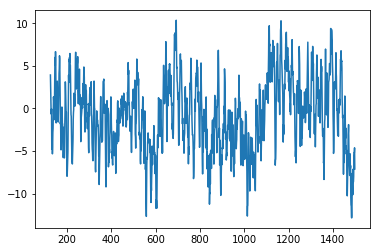

In [15]:
print('channel:', interest_channels[0])
print('number of data points:', len(X[target_ids[0]][block_ids[0]][interest_channels[0]]))
plt.plot(X[target_ids[0]][block_ids[0]][interest_channels[0]])

### 2. Generate Reference Signal

In [16]:
sin = lambda f, h, t, p: np.sin(2*PI*f*h*t + p)
cos = lambda f, h, t, p: np.cos(2*PI*f*h*t + p)
ref_wave = lambda f, h, t, p: [sin(f, h, t, p), cos(f, h, t, p)]

def generate_reference_signal_at_time(f, t, max_harmonic, phase):
    values = []
    for h in range(1, max_harmonic + 1):
        values += ref_wave(f, h, t, phase)
    return values

def generate_reference_signal(frequency, sampling_frequency, total_time, max_harmonic, phase):
    ref_signal = []
    num_time_step = total_time * sampling_frequency
    for step in range(num_time_step):
        time = step * 1/sampling_frequency
        ref_signal_at_t = generate_reference_signal_at_time(frequency, time, max_harmonic, phase)
        ref_signal.append(ref_signal_at_t)
    return ref_signal

In [17]:
Y = {}
for setting_index in target_setting.index:
    frequency, phase = target_setting.iloc[setting_index]
    signal = generate_reference_signal(
        frequency=frequency,
        sampling_frequency=250,
        total_time=6,
        max_harmonic=6,
        phase=phase
    )
    Y[f'setting_{setting_index}'] = pd.DataFrame(signal[post_stimulus_time_index:])

In [18]:
# columns are [sin, cos] * [number of harmonic]
# rows are time steps
# Example Reference Signal
Y['setting_0'].head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-9.797174e-16,1.000000,-1.959435e-15,1.000000,-2.939152e-15,1.000000,-3.918870e-15,1.000000,-4.898587e-15,1.000000,-5.878305e-15,1.000000
1,1.997100e-01,0.979855,3.913737e-01,0.920232,5.672689e-01,0.823533,7.203090e-01,0.693653,8.443279e-01,0.535827,9.343289e-01,0.356412
2,3.913737e-01,0.920232,7.203090e-01,0.693653,9.343289e-01,0.356412,9.992895e-01,-0.037690,9.048271e-01,-0.425779,6.660119e-01,-0.745941
3,5.672689e-01,0.823533,9.343289e-01,0.356412,9.716317e-01,-0.236499,6.660119e-01,-0.745941,1.253332e-01,-0.992115,-4.595799e-01,-0.888136
4,7.203090e-01,0.693653,9.992895e-01,-0.037690,6.660119e-01,-0.745941,-7.532681e-02,-0.997159,-7.705132e-01,-0.637424,-9.936113e-01,0.112856


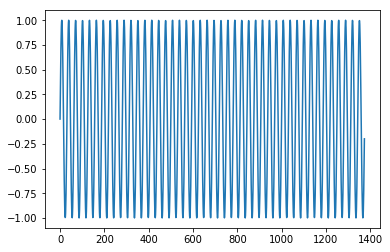

In [19]:
plt.plot(Y['setting_0'][0])

### 3. Optimization to find max ρ (canonial correlation)

In [20]:
def find_maximum_canonical_correlations(X, Y):
    if X.shape[0] == Y.shape[0]:
        N = X.shape[0]
    else:
        print('time frame is not equal')
        return None
    C_xx = 1/N * (X.T @ X)
    C_yy = 1/N * (Y.T @ Y)
    C_xy = 1/N * (X.T @ Y)
    C_yx = 1/N * (Y.T @ X)
    C_xx_inv = np.linalg.pinv(C_xx)
    C_yy_inv = np.linalg.pinv(C_yy)
    eig_values, eig_vectors = scipy.linalg.eig(C_yy_inv @ C_yx @ C_xx_inv @ C_xy)
    sqrt_eig_values = np.sqrt(eig_values)
    return max(sqrt_eig_values)


In [21]:
result = {}
# X[target_id][block_id]
for target_id in target_ids:
    if target_id not in result:
        result[target_id] = {}
    for block_id in block_ids:
        if block_id not in result[target_id]:
            result[target_id][block_id] = {}
        keys = list(Y.keys())
        for ref_signal_id in keys:
            value = find_maximum_canonical_correlations(
                X = X[target_id][block_id].values,
                Y = Y[ref_signal_id].values
            )
            if value.imag == 0.0:
                result[target_id][block_id][ref_signal_id] = value.real
            else:
                result[target_id][block_id][ref_signal_id] = None

### 4. Classification & Accuracy of the algorithm

In [22]:
for target_id in target_ids:
    display(Markdown(f"## Target: {target_id}"))
    df = pd.DataFrame.from_dict(result[target_id])
    display(Markdown('### Classification:'))
    num_correct= 0
    for block_id in block_ids:
        _, top_correlation_setting = df[block_id].idxmax().split('_')
        is_correct = int(top_correlation_setting) == target_id
        if is_correct:
            num_correct += 1
        display(
            Markdown(f'Block #{block_id} Correct output should be {target_id}, classify as {top_correlation_setting}: **{is_correct}**')
        )
    display(
        Markdown('Accuracy: **%.2f%%**'%(num_correct/len(block_ids)*100))
    )
    display(Markdown('### Raw Max CC Value (rows are blocks)'))
    display(df)

## Target: 0

### Classification:

Block #0 Correct output should be 0, classify as 0: **True**

Block #1 Correct output should be 0, classify as 0: **True**

Block #2 Correct output should be 0, classify as 18: **False**

Block #3 Correct output should be 0, classify as 0: **True**

Block #4 Correct output should be 0, classify as 0: **True**

Block #5 Correct output should be 0, classify as 26: **False**

Accuracy: **66.67%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.464428,0.400405,0.410068,0.427501,0.459329,0.368812
setting_1,0.142679,0.188389,0.173716,0.194172,0.162804,0.142352
setting_10,0.201827,0.307428,0.251305,0.218589,0.203685,0.177114
setting_11,0.176514,0.207078,0.231270,0.160343,0.264828,0.161199
setting_12,0.154436,0.173795,0.172440,0.175403,0.199193,0.187317
setting_13,0.122702,0.101847,0.080474,0.231043,0.146191,0.168701
setting_14,0.104039,0.124030,0.139404,0.132382,0.116992,0.126426
setting_15,0.121308,0.112823,0.093489,0.145038,0.151507,0.107005
setting_16,0.163521,0.144199,0.138321,0.143140,0.146055,0.135416
setting_17,0.165954,0.232046,0.184363,0.163185,0.144491,0.184970


## Target: 1

### Classification:

Block #0 Correct output should be 1, classify as 1: **True**

Block #1 Correct output should be 1, classify as 1: **True**

Block #2 Correct output should be 1, classify as 1: **True**

Block #3 Correct output should be 1, classify as 1: **True**

Block #4 Correct output should be 1, classify as 1: **True**

Block #5 Correct output should be 1, classify as 1: **True**

Accuracy: **100.00%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.307731,0.135521,0.207994,0.211064,0.141982,0.195456
setting_1,0.567498,0.446504,0.477592,0.424918,0.495097,0.481628
setting_10,0.271360,0.138555,0.144467,0.274134,0.216032,0.266098
setting_11,0.229171,0.142454,0.232726,0.088464,0.204488,0.159592
setting_12,0.172630,0.184108,0.288063,0.150043,0.157105,0.240975
setting_13,0.123840,0.167031,0.156418,0.125503,0.241305,0.112516
setting_14,0.117754,0.136687,0.158347,0.104763,0.206201,0.124077
setting_15,0.112080,0.096235,0.163083,0.114810,0.106588,0.133796
setting_16,0.141317,0.155937,0.172044,0.174422,0.201463,0.121013
setting_17,0.147559,0.136198,0.190548,0.145156,0.133740,0.169329


## Target: 2

### Classification:

Block #0 Correct output should be 2, classify as 2: **True**

Block #1 Correct output should be 2, classify as 2: **True**

Block #2 Correct output should be 2, classify as 2: **True**

Block #3 Correct output should be 2, classify as 2: **True**

Block #4 Correct output should be 2, classify as 2: **True**

Block #5 Correct output should be 2, classify as 2: **True**

Accuracy: **100.00%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.161680,0.150896,0.156543,0.155812,0.137105,0.190635
setting_1,0.176264,0.229613,0.189915,0.188510,0.246883,0.189521
setting_10,0.251414,0.205583,0.211258,0.238482,0.298722,0.259991
setting_11,0.201241,0.133932,0.168235,0.220367,0.224779,0.193892
setting_12,0.171565,0.127218,0.212645,0.221453,0.205825,0.215364
setting_13,0.134058,0.120624,0.150631,0.149006,0.187245,0.137358
setting_14,0.098236,0.127906,0.121478,0.111837,0.142187,0.115196
setting_15,0.128283,0.133370,0.095076,0.134212,0.118361,0.124376
setting_16,0.177527,0.155734,0.128416,0.156276,0.133458,0.128163
setting_17,0.205078,0.122635,0.165574,0.192450,0.134673,0.131753


## Target: 3

### Classification:

Block #0 Correct output should be 3, classify as 3: **True**

Block #1 Correct output should be 3, classify as 3: **True**

Block #2 Correct output should be 3, classify as 3: **True**

Block #3 Correct output should be 3, classify as 3: **True**

Block #4 Correct output should be 3, classify as 3: **True**

Block #5 Correct output should be 3, classify as 3: **True**

Accuracy: **100.00%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.151523,0.130975,0.121100,0.158197,0.176097,0.158321
setting_1,0.124181,0.183055,0.110714,0.207874,0.130090,0.139373
setting_10,0.184296,0.273267,0.340366,0.166107,0.387171,0.151800
setting_11,0.186873,0.329262,0.285010,0.236366,0.257146,0.315898
setting_12,0.243207,0.218492,0.127732,0.172263,0.180832,0.163164
setting_13,0.141610,0.218598,0.177483,0.167896,0.148192,0.133639
setting_14,0.140228,0.199322,0.144776,0.114952,0.156875,0.108717
setting_15,0.118802,0.166214,0.126162,0.122805,0.099378,0.132457
setting_16,0.118988,0.162630,0.131641,0.133106,0.139056,0.187991
setting_17,0.162483,0.132353,0.139967,0.161782,0.131395,0.134953


## Target: 4

### Classification:

Block #0 Correct output should be 4, classify as 4: **True**

Block #1 Correct output should be 4, classify as 4: **True**

Block #2 Correct output should be 4, classify as 4: **True**

Block #3 Correct output should be 4, classify as 4: **True**

Block #4 Correct output should be 4, classify as 4: **True**

Block #5 Correct output should be 4, classify as 4: **True**

Accuracy: **100.00%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.180992,0.193299,0.214716,0.201639,0.228854,0.175137
setting_1,0.157327,0.218229,0.142681,0.190968,0.150237,0.153573
setting_10,0.332155,0.209409,0.214297,0.130586,0.280707,0.284362
setting_11,0.221351,0.213396,0.138196,0.214417,0.228464,0.270440
setting_12,0.265294,0.266130,0.195023,0.243733,0.300815,0.311356
setting_13,0.152411,0.197352,0.153337,0.144607,0.297871,0.116196
setting_14,0.104303,0.127817,0.154442,0.152270,0.155918,0.132165
setting_15,0.094924,0.157120,0.092186,0.126472,0.112759,0.102394
setting_16,0.163691,0.142503,0.128629,0.171750,0.127419,0.134360
setting_17,0.128194,0.182999,0.121415,0.155949,0.152165,0.189326


## Target: 5

### Classification:

Block #0 Correct output should be 5, classify as 5: **True**

Block #1 Correct output should be 5, classify as 5: **True**

Block #2 Correct output should be 5, classify as 5: **True**

Block #3 Correct output should be 5, classify as 5: **True**

Block #4 Correct output should be 5, classify as 4: **False**

Block #5 Correct output should be 5, classify as 5: **True**

Accuracy: **83.33%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.180898,0.170666,0.156367,0.173951,0.247927,0.201193
setting_1,0.174032,0.129306,0.157955,0.135722,0.115043,0.189463
setting_10,0.192894,0.194301,0.122033,0.114832,0.124978,0.199008
setting_11,0.197890,0.161749,0.139735,0.148845,0.198254,0.175009
setting_12,0.235979,0.183100,0.220583,0.205400,0.232910,0.199745
setting_13,0.184744,0.206217,0.139589,0.246480,0.202146,0.158138
setting_14,0.172321,0.144791,0.127439,0.127462,0.147204,0.138095
setting_15,0.105801,0.119402,0.149945,0.133089,0.136411,0.137328
setting_16,0.168473,0.149191,0.156785,0.170061,0.166848,0.188868
setting_17,0.147695,0.156075,0.121098,0.139942,0.150706,0.173634


## Target: 6

### Classification:

Block #0 Correct output should be 6, classify as 6: **True**

Block #1 Correct output should be 6, classify as 18: **False**

Block #2 Correct output should be 6, classify as 6: **True**

Block #3 Correct output should be 6, classify as 6: **True**

Block #4 Correct output should be 6, classify as 6: **True**

Block #5 Correct output should be 6, classify as 6: **True**

Accuracy: **83.33%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.172709,0.190454,0.152773,0.156171,0.165855,0.119054
setting_1,0.224926,0.183607,0.137925,0.160615,0.140385,0.132141
setting_10,0.170142,0.210568,0.141101,0.173691,0.191035,0.283170
setting_11,0.176428,0.178575,0.154597,0.187107,0.160000,0.289165
setting_12,0.177603,0.181039,0.162010,0.128194,0.163443,0.198740
setting_13,0.203190,0.183370,0.183435,0.200761,0.171023,0.197721
setting_14,0.192426,0.189113,0.251564,0.146428,0.233491,0.168264
setting_15,0.133984,0.151897,0.131103,0.119209,0.106129,0.107734
setting_16,0.198226,0.169839,0.149944,0.177848,0.170158,0.146063
setting_17,0.147679,0.151105,0.170191,0.138405,0.154145,0.180171


## Target: 7

### Classification:

Block #0 Correct output should be 7, classify as 7: **True**

Block #1 Correct output should be 7, classify as 7: **True**

Block #2 Correct output should be 7, classify as 18: **False**

Block #3 Correct output should be 7, classify as 26: **False**

Block #4 Correct output should be 7, classify as 7: **True**

Block #5 Correct output should be 7, classify as 7: **True**

Accuracy: **66.67%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.171859,0.193269,0.102440,0.172283,0.128619,0.135084
setting_1,0.150260,0.159846,0.148194,0.143051,0.160117,0.170718
setting_10,0.171905,0.214559,0.283562,0.120271,0.276042,0.188378
setting_11,0.268664,0.227683,0.115492,0.246167,0.215166,0.287857
setting_12,0.225459,0.229149,0.203665,0.297015,0.122765,0.140320
setting_13,0.168467,0.129316,0.156541,0.163119,0.153039,0.124521
setting_14,0.142641,0.180440,0.198550,0.127772,0.170839,0.146841
setting_15,0.190044,0.163298,0.230416,0.172638,0.194806,0.175994
setting_16,0.153759,0.162767,0.154437,0.109330,0.143817,0.138843
setting_17,0.158153,0.162735,0.127298,0.166271,0.162213,0.122673


## Target: 8

### Classification:

Block #0 Correct output should be 8, classify as 8: **True**

Block #1 Correct output should be 8, classify as 18: **False**

Block #2 Correct output should be 8, classify as 8: **True**

Block #3 Correct output should be 8, classify as 8: **True**

Block #4 Correct output should be 8, classify as 8: **True**

Block #5 Correct output should be 8, classify as 8: **True**

Accuracy: **83.33%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.140305,0.191910,0.150071,0.170344,0.174684,0.186378
setting_1,0.150716,0.147153,0.150793,0.121565,0.160146,0.165974
setting_10,0.312512,0.432006,0.130350,0.153382,0.301416,0.235022
setting_11,0.172516,0.115986,0.131077,0.157087,0.169490,0.137436
setting_12,0.149394,0.121829,0.141732,0.162604,0.150685,0.152314
setting_13,0.170356,0.205612,0.111851,0.152909,0.126367,0.126055
setting_14,0.137185,0.109749,0.156727,0.102661,0.119552,0.114426
setting_15,0.112937,0.128726,0.094034,0.128705,0.133692,0.121338
setting_16,0.260213,0.218017,0.184786,0.226531,0.229606,0.309549
setting_17,0.151579,0.132860,0.159377,0.207888,0.218082,0.131078


## Target: 9

### Classification:

Block #0 Correct output should be 9, classify as 9: **True**

Block #1 Correct output should be 9, classify as 9: **True**

Block #2 Correct output should be 9, classify as 9: **True**

Block #3 Correct output should be 9, classify as 9: **True**

Block #4 Correct output should be 9, classify as 9: **True**

Block #5 Correct output should be 9, classify as 9: **True**

Accuracy: **100.00%**

### Raw Max CC Value (rows are blocks)

,0,1,2,3,4,5
setting_0,0.130313,0.134225,0.234343,0.192062,0.146807,0.164245
setting_1,0.135339,0.130270,0.186463,0.168225,0.146365,0.124604
setting_10,0.256514,0.168522,0.161031,0.219382,0.282739,0.190658
setting_11,0.148998,0.182800,0.192912,0.187877,0.330744,0.312269
setting_12,0.182395,0.191180,0.197531,0.226139,0.205418,0.173683
setting_13,0.136195,0.191200,0.146210,0.151352,0.139942,0.132545
setting_14,0.121378,0.158993,0.112704,0.128704,0.141116,0.118284
setting_15,0.129574,0.139943,0.107402,0.142076,0.114720,0.118097
setting_16,0.182499,0.184323,0.168003,0.191125,0.136998,0.180782
setting_17,0.219752,0.286398,0.230008,0.238067,0.193322,0.279612
